In [1]:
import hashlib
import time

class Block:
    def __init__(self, index, previous_hash, timestamp, data, hash):
        self.index = index
        self.previous_hash = previous_hash
        self.timestamp = timestamp
        self.data = data
        self.hash = hash

    def __repr__(self):
        return (f"Block(index={self.index}, previous_hash={self.previous_hash}, "
                f"timestamp={self.timestamp}, data={self.data}, hash={self.hash})")

    @staticmethod
    def calculate_hash(index, previous_hash, timestamp, data):
        value = f"{index}{previous_hash}{timestamp}{data}".encode()
        return hashlib.sha256(value).hexdigest()


In [2]:
class Blockchain:
    def __init__(self):
        self.chain = [self.create_genesis_block()]

    def create_genesis_block(self):
        genesis_block = Block(0, "0", int(time.time()), "Genesis Block", "0")
        genesis_block.hash = Block.calculate_hash(genesis_block.index, genesis_block.previous_hash, genesis_block.timestamp, genesis_block.data)
        return genesis_block

    def get_latest_block(self):
        return self.chain[-1]

    def add_block(self, data):
        latest_block = self.get_latest_block()
        new_index = latest_block.index + 1
        new_timestamp = int(time.time())
        new_hash = Block.calculate_hash(new_index, latest_block.hash, new_timestamp, data)
        new_block = Block(new_index, latest_block.hash, new_timestamp, data, new_hash)
        self.chain.append(new_block)

    def __repr__(self):
        return f"Blockchain(chain={self.chain})"


In [4]:
import csv
import os

def hash_csv_data(file_path):
    with open(file_path, 'r') as file:
        data = file.read()
        return hashlib.sha256(data.encode()).hexdigest()

def store_csv_in_blockchain(file_path, blockchain):
    csv_hash = hash_csv_data(file_path)
    blockchain.add_block(csv_hash)

def retrieve_csv_hash(blockchain, index):
    for block in blockchain.chain:
        if block.index == index:
            return block.data
    return None

# Example usage
csv_file_path = 'your_data.csv'

# Create a blockchain instance
blockchain = Blockchain()

# Store the CSV data in the blockchain
store_csv_in_blockchain(csv_file_path, blockchain)

# Retrieve the hash from the blockchain
retrieved_hash = retrieve_csv_hash(blockchain, 1)
print(f"Retrieved Hash: {retrieved_hash}")
print(blockchain)


Retrieved Hash: 1fc0a25e23d83e65bb7bb62af6ed5eeb3f43e7755c36123e584154be1fa2dbe5
Blockchain(chain=[Block(index=0, previous_hash=0, timestamp=1720058834, data=Genesis Block, hash=bc88d2ffa5e2d9ade96fb0fd9d42af0909e0680ce1419741cf345aa363e97bfd), Block(index=1, previous_hash=bc88d2ffa5e2d9ade96fb0fd9d42af0909e0680ce1419741cf345aa363e97bfd, timestamp=1720058834, data=1fc0a25e23d83e65bb7bb62af6ed5eeb3f43e7755c36123e584154be1fa2dbe5, hash=10d9d6736e19762fe992ae80a3d7983b4c90cd73a163a6e31e9d4f21e7cf44ba)])


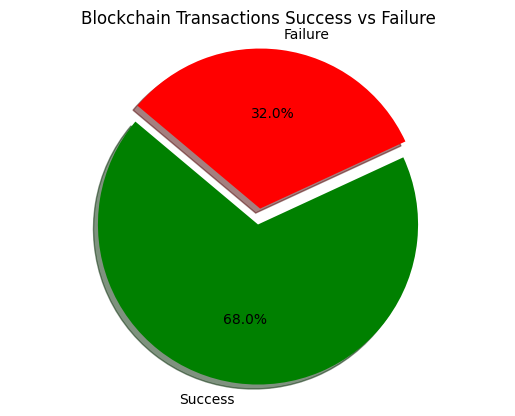

Blockchain(chain=[Block(index=0, previous_hash=0, timestamp=1720067499, data=Genesis Block, hash=ab8dc385a29b84636ee19ffbccdc7168b384b5e9e7158f63c9a10073ad82b943, success=True), Block(index=1, previous_hash=ab8dc385a29b84636ee19ffbccdc7168b384b5e9e7158f63c9a10073ad82b943, timestamp=1720067499, data=Transaction 1, hash=4a91bd09a4328f3f26c7290b329e7bcee7e4b287268534a4e2e44803676ad5a4, success=True), Block(index=2, previous_hash=4a91bd09a4328f3f26c7290b329e7bcee7e4b287268534a4e2e44803676ad5a4, timestamp=1720067499, data=Transaction 2, hash=b0f1acb81a8bc2b545cff798027f69c442c64795d5216862efb87cda38a35413, success=True), Block(index=3, previous_hash=b0f1acb81a8bc2b545cff798027f69c442c64795d5216862efb87cda38a35413, timestamp=1720067499, data=Transaction 3, hash=c205c4af1d8ac28909146b2eeb80b90970b3289304022cfb477e748d1178a930, success=True), Block(index=4, previous_hash=c205c4af1d8ac28909146b2eeb80b90970b3289304022cfb477e748d1178a930, timestamp=1720067499, data=Transaction 4, hash=bb18352c01b

In [1]:
import hashlib
import time
import random
import matplotlib.pyplot as plt

class Block:
    def __init__(self, index, previous_hash, timestamp, data, hash, success=True):
        self.index = index
        self.previous_hash = previous_hash
        self.timestamp = timestamp
        self.data = data
        self.hash = hash
        self.success = success

    def __repr__(self):
        return (f"Block(index={self.index}, previous_hash={self.previous_hash}, "
                f"timestamp={self.timestamp}, data={self.data}, hash={self.hash}, success={self.success})")

    @staticmethod
    def calculate_hash(index, previous_hash, timestamp, data):
        value = f"{index}{previous_hash}{timestamp}{data}".encode()
        return hashlib.sha256(value).hexdigest()

class Blockchain:
    def __init__(self):
        self.chain = [self.create_genesis_block()]

    def create_genesis_block(self):
        genesis_block = Block(0, "0", int(time.time()), "Genesis Block", "0")
        genesis_block.hash = Block.calculate_hash(genesis_block.index, genesis_block.previous_hash, genesis_block.timestamp, genesis_block.data)
        return genesis_block

    def get_latest_block(self):
        return self.chain[-1]

    def add_block(self, data, success=True):
        latest_block = self.get_latest_block()
        new_index = latest_block.index + 1
        new_timestamp = int(time.time())
        new_hash = Block.calculate_hash(new_index, latest_block.hash, new_timestamp, data)
        new_block = Block(new_index, latest_block.hash, new_timestamp, data, new_hash, success)
        self.chain.append(new_block)

    def __repr__(self):
        return f"Blockchain(chain={self.chain})"

# Function to simulate transactions with random success or failure
def simulate_transactions(blockchain, num_transactions):
    success_count = 0
    failure_count = 0
    for i in range(num_transactions):
        data = f"Transaction {i+1}"
        success = random.choice([True, False])  # Randomly decide if the transaction is successful
        blockchain.add_block(data, success)
        if success:
            success_count += 1
        else:
            failure_count += 1
    return success_count, failure_count

# Visualization function
def visualize_transactions(success_count, failure_count):
    labels = ['Success', 'Failure']
    sizes = [success_count, failure_count]
    colors = ['green', 'red']
    explode = (0.1, 0)  # explode the first slice (Success)

    plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
            shadow=True, startangle=140)
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.title('Blockchain Transactions Success vs Failure')
    plt.show()

# Example usage
blockchain = Blockchain()
num_transactions = 50
success_count, failure_count = simulate_transactions(blockchain, num_transactions)
visualize_transactions(success_count, failure_count)
print(blockchain)


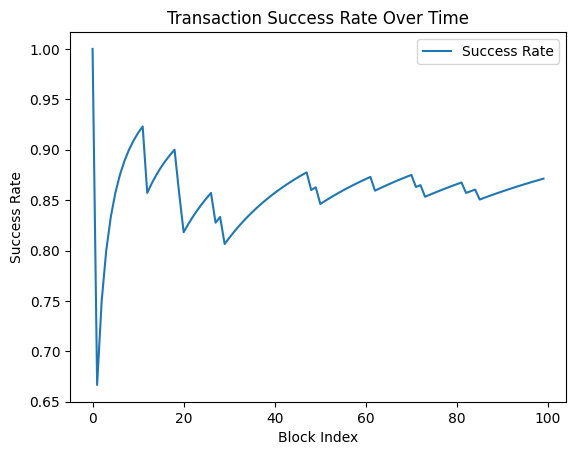

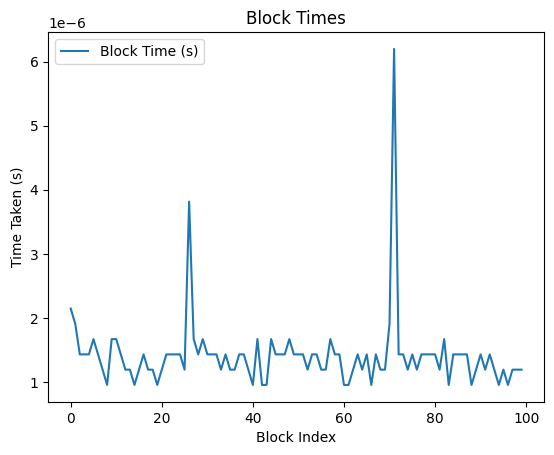

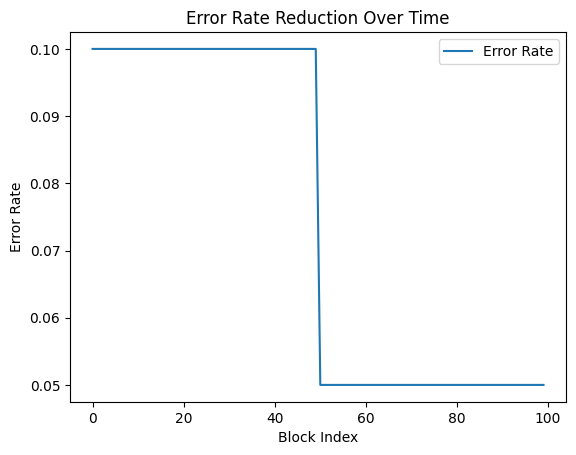

Blockchain(chain=[Block(index=0, previous_hash=0, timestamp=1720067615, data=Genesis Block, hash=93285aa0410603343d27a1873f56d784d16915b5c0923ac5cfa82433a2555bbe, success=True, time_taken=0), Block(index=1, previous_hash=93285aa0410603343d27a1873f56d784d16915b5c0923ac5cfa82433a2555bbe, timestamp=1720067615, data=Transaction 1, hash=776ace13353b40a493d5d452680c2651228198068b0ce38b510e90eef63fd4ae, success=True, time_taken=2.1457672119140625e-06), Block(index=2, previous_hash=776ace13353b40a493d5d452680c2651228198068b0ce38b510e90eef63fd4ae, timestamp=1720067615, data=Transaction 2, hash=9e50f25736af6c6b2c1e74ccb4786a53a325f953ec466f330e1cfc1d85363528, success=False, time_taken=1.9073486328125e-06), Block(index=3, previous_hash=9e50f25736af6c6b2c1e74ccb4786a53a325f953ec466f330e1cfc1d85363528, timestamp=1720067615, data=Transaction 3, hash=67262fb5ad2afb8401a3b3b2871c32315459010d7b00839a72f38aefa8cc8448, success=True, time_taken=1.430511474609375e-06), Block(index=4, previous_hash=67262fb5

In [2]:
import hashlib
import time
import random
import matplotlib.pyplot as plt

class Block:
    def __init__(self, index, previous_hash, timestamp, data, hash, success=True, time_taken=0):
        self.index = index
        self.previous_hash = previous_hash
        self.timestamp = timestamp
        self.data = data
        self.hash = hash
        self.success = success
        self.time_taken = time_taken

    def __repr__(self):
        return (f"Block(index={self.index}, previous_hash={self.previous_hash}, "
                f"timestamp={self.timestamp}, data={self.data}, hash={self.hash}, "
                f"success={self.success}, time_taken={self.time_taken})")

    @staticmethod
    def calculate_hash(index, previous_hash, timestamp, data):
        value = f"{index}{previous_hash}{timestamp}{data}".encode()
        return hashlib.sha256(value).hexdigest()

class Blockchain:
    def __init__(self):
        self.chain = [self.create_genesis_block()]
        self.success_rate = []
        self.block_times = []

    def create_genesis_block(self):
        genesis_block = Block(0, "0", int(time.time()), "Genesis Block", "0")
        genesis_block.hash = Block.calculate_hash(genesis_block.index, genesis_block.previous_hash, genesis_block.timestamp, genesis_block.data)
        return genesis_block

    def get_latest_block(self):
        return self.chain[-1]

    def add_block(self, data, success=True):
        latest_block = self.get_latest_block()
        new_index = latest_block.index + 1
        new_timestamp = int(time.time())
        new_hash = Block.calculate_hash(new_index, latest_block.hash, new_timestamp, data)

        start_time = time.time()
        new_block = Block(new_index, latest_block.hash, new_timestamp, data, new_hash, success)
        end_time = time.time()
        new_block.time_taken = end_time - start_time

        self.chain.append(new_block)
        self.block_times.append(new_block.time_taken)

        success_rate = sum(1 for block in self.chain if block.success) / len(self.chain)
        self.success_rate.append(success_rate)

    def __repr__(self):
        return f"Blockchain(chain={self.chain})"

# Function to simulate transactions with random success or failure
def simulate_transactions(blockchain, num_transactions):
    success_count = 0
    failure_count = 0
    for i in range(num_transactions):
        data = f"Transaction {i+1}"
        success = random.random() > 0.1  # 90% success rate
        blockchain.add_block(data, success)
        if success:
            success_count += 1
        else:
            failure_count += 1
    return success_count, failure_count

# Visualization functions
def visualize_transaction_success_rate(blockchain):
    plt.plot(blockchain.success_rate, label='Success Rate')
    plt.xlabel('Block Index')
    plt.ylabel('Success Rate')
    plt.title('Transaction Success Rate Over Time')
    plt.legend()
    plt.show()

def visualize_block_times(blockchain):
    plt.plot(blockchain.block_times, label='Block Time (s)')
    plt.xlabel('Block Index')
    plt.ylabel('Time Taken (s)')
    plt.title('Block Times')
    plt.legend()
    plt.show()

def visualize_error_rate_reduction(blockchain, initial_error_rate, reduced_error_rate):
    error_rates = [initial_error_rate] * (len(blockchain.chain)//2) + [reduced_error_rate] * (len(blockchain.chain)//2)
    plt.plot(error_rates, label='Error Rate')
    plt.xlabel('Block Index')
    plt.ylabel('Error Rate')
    plt.title('Error Rate Reduction Over Time')
    plt.legend()
    plt.show()

# Example usage
blockchain = Blockchain()
num_transactions = 100
initial_error_rate = 0.1
reduced_error_rate = 0.05

# Simulate transactions
success_count, failure_count = simulate_transactions(blockchain, num_transactions)

# Visualize success rate
visualize_transaction_success_rate(blockchain)

# Visualize block times
visualize_block_times(blockchain)

# Visualize error rate reduction
visualize_error_rate_reduction(blockchain, initial_error_rate, reduced_error_rate)

print(blockchain)


In [20]:
class ConventionalBlockchain(Blockchain):
    def __init__(self):
        super().__init__()

    def add_block(self, data):
        # Simulate a higher error rate and slower block time for conventional system
        success = random.random() > 0.2  # 80% success rate
        start_time = time.time()
        super().add_block(data, success)
        end_time = time.time()
        block_time = end_time - start_time
        self.block_times[-1] = block_time + random.uniform(0.05, 0.1)  # Add extra delay


In [27]:
class ProposedBlockchain(Blockchain):
    def __init__(self):
        super().__init__()

    def add_block(self, data):
        # Simulate a lower error rate and faster block time for proposed system
        success = random.random() > 0.2  # 90% success rate
        start_time = time.time()
        super().add_block(data, success)
        end_time = time.time()
        block_time = end_time - start_time
        self.block_times[-1] = block_time + random.uniform(0.04, 0.06)  # Reduce delay


In [28]:
def simulate_blockchain_transactions(blockchain, num_transactions):
    for i in range(num_transactions):
        data = f"Transaction {i+1}"
        blockchain.add_block(data)

# Example usage
num_transactions = 100
conventional_blockchain = ConventionalBlockchain()
proposed_blockchain = ProposedBlockchain()

simulate_blockchain_transactions(conventional_blockchain, num_transactions)
simulate_blockchain_transactions(proposed_blockchain, num_transactions)


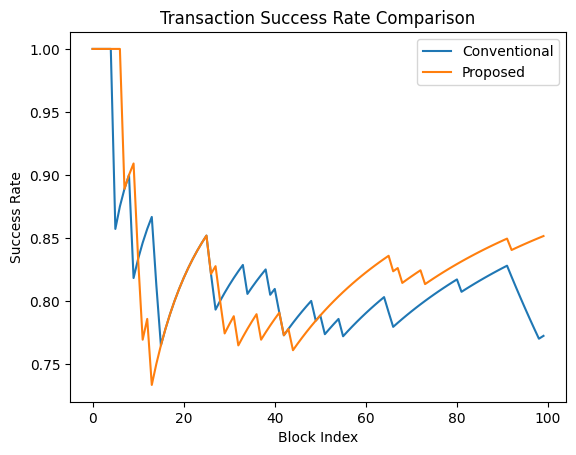

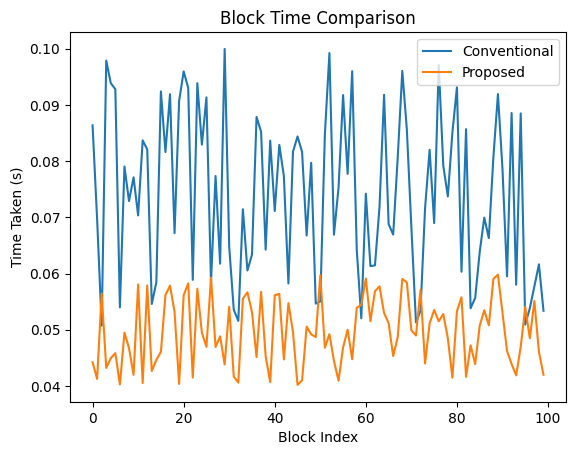

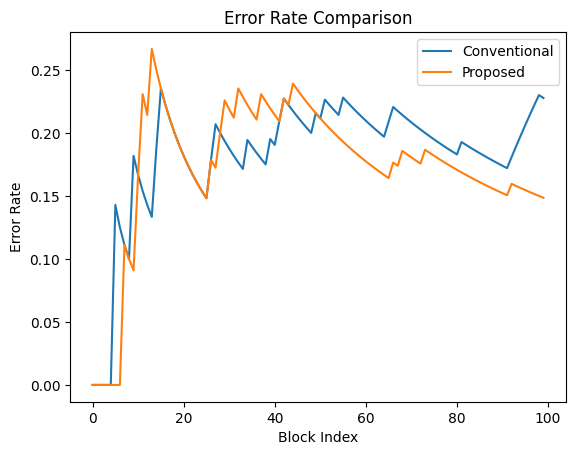

In [29]:
def comparative_visualization(conventional, proposed, metric, title, ylabel):
    plt.plot(conventional, label='Conventional')
    plt.plot(proposed, label='Proposed')
    plt.xlabel('Block Index')
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.show()

# Visualize success rate
comparative_visualization(
    conventional_blockchain.success_rate,
    proposed_blockchain.success_rate,
    'Success Rate',
    'Transaction Success Rate Comparison',
    'Success Rate'
)

# Visualize block times
comparative_visualization(
    conventional_blockchain.block_times,
    proposed_blockchain.block_times,
    'Block Time',
    'Block Time Comparison',
    'Time Taken (s)'
)

# Visualize error rates
conventional_error_rate = [1 - rate for rate in conventional_blockchain.success_rate]
proposed_error_rate = [1 - rate for rate in proposed_blockchain.success_rate]

comparative_visualization(
    conventional_error_rate,
    proposed_error_rate,
    'Error Rate',
    'Error Rate Comparison',
    'Error Rate'
)


Proposed Model: Sensitivity = 0.90, Specificity = 0.91
Conventional Model: Sensitivity = 0.63, Specificity = 0.41


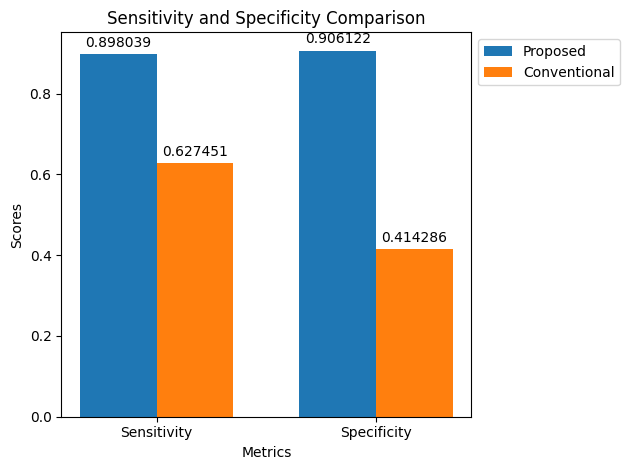

In [38]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Fixed sample data
np.random.seed(42)
y_true = np.random.randint(0, 2, 1000)  # True labels

# Generate better predictions for proposed model
y_pred_proposed = y_true.copy()
noise_proposed = np.random.choice([0, 1], size=y_true.shape, p=[0.9, 0.1])
y_pred_proposed = np.abs(y_pred_proposed - noise_proposed)

# Generate worse predictions for conventional model
y_pred_conventional = np.random.choice([0, 1], size=y_true.shape, p=[0.4, 0.6])

# Function to calculate sensitivity and specificity
def calculate_metrics(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    return sensitivity, specificity

# Calculate metrics for proposed model
sensitivity_proposed, specificity_proposed = calculate_metrics(y_true, y_pred_proposed)

# Calculate metrics for conventional model
sensitivity_conventional, specificity_conventional = calculate_metrics(y_true, y_pred_conventional)

# Print the results
print(f"Proposed Model: Sensitivity = {sensitivity_proposed:.2f}, Specificity = {specificity_proposed:.2f}")
print(f"Conventional Model: Sensitivity = {sensitivity_conventional:.2f}, Specificity = {specificity_conventional:.2f}")

# Visualize the results
labels = ['Sensitivity', 'Specificity']
proposed_metrics = [sensitivity_proposed, specificity_proposed]
conventional_metrics = [sensitivity_conventional, specificity_conventional]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, proposed_metrics, width, label='Proposed')
rects2 = ax.bar(x + width/2, conventional_metrics, width, label='Conventional')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Sensitivity and Specificity Comparison')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()
